<a href="https://colab.research.google.com/github/Pradip240/IPL-T20-Cricket-Analysis/blob/main/Hrithik__IPL_T20_Cricket_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

In [75]:
#import packages

import pandas as pd
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt
import seaborn as sea
from scipy.stats import norm
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load Teamwise home & away data
working_dir_path1 = '/content/drive/MyDrive/Alma Better Cohort Nilgiri/Capstone Project/Exploratory Data Analysis Capstone Project/IPL T20 Cricket Analysis/IPL Data/teamwise_home_and_away.csv'
teamwise_home_and_away_df = pd.read_csv(working_dir_path1)

# Load most runs average strikerate data
working_dir_path2 = '/content/drive/MyDrive/Alma Better Cohort Nilgiri/Capstone Project/Exploratory Data Analysis Capstone Project/IPL T20 Cricket Analysis/IPL Data/most_runs_average_strikerate.csv'
most_runs_average_strikerate_df = pd.read_csv(working_dir_path2)

In [5]:
teamwise_home_and_away_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 14 non-null     object 
 1   home_wins            14 non-null     int64  
 2   away_wins            14 non-null     int64  
 3   home_matches         14 non-null     int64  
 4   away_matches         14 non-null     int64  
 5   home_win_percentage  14 non-null     float64
 6   away_win_percentage  14 non-null     float64
dtypes: float64(2), int64(4), object(1)
memory usage: 912.0+ bytes


In [6]:
teamwise_home_and_away_df.describe()

,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,23.928571,29.428571,53.500000,53.500000,41.737663,55.574283
std,18.685512,20.816836,35.821674,35.883894,14.095272,13.669679
min,1.000000,4.000000,6.000000,7.000000,7.142857,23.076923
25%,5.250000,8.000000,15.500000,18.500000,36.282631,51.625387
50%,27.000000,35.000000,65.000000,60.000000,41.809353,58.401163
75%,34.750000,48.250000,84.500000,85.750000,49.404762,62.430556
max,58.000000,58.000000,101.000000,95.000000,62.500000,75.000000


In [7]:
teamwise_home_and_away_df.head(14)

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222
5,Rajasthan Royals,29,46,67,80,43.283582,57.500000
6,Deccan Chargers,18,11,43,32,41.860465,34.375000
7,Kings XI Punjab,38,44,91,85,41.758242,51.764706
8,Royal Challengers Bangalore,35,49,85,95,41.176471,51.578947
9,Kolkata Knight Riders,34,58,83,95,40.963855,61.052632


In [8]:
team = teamwise_home_and_away_df['team'].loc[0:13]

In [9]:
team

0          Rising Pune Supergiant
1                  Mumbai Indians
2             Chennai Super Kings
3                  Delhi Capitals
4             Sunrisers Hyderabad
5                Rajasthan Royals
6                 Deccan Chargers
7                 Kings XI Punjab
8     Royal Challengers Bangalore
9           Kolkata Knight Riders
10               Delhi Daredevils
11                  Pune Warriors
12           Kochi Tuskers Kerala
13                  Gujarat Lions
Name: team, dtype: object

In [10]:
length_of_team = np.array(len(team))

In [11]:
length_of_team

array(14)

In [12]:
home_wins_of_team = teamwise_home_and_away_df['home_wins']

In [13]:
home_wins_of_team

0      5
1     58
2     51
3      3
4     30
5     29
6     18
7     38
8     35
9     34
10    25
11     6
12     2
13     1
Name: home_wins, dtype: int64

In [14]:
away_wins_of_team = teamwise_home_and_away_df['away_wins']

In [15]:
away_wins_of_team

0      5
1     51
2     49
3      7
4     28
5     46
6     11
7     44
8     49
9     58
10    42
11     6
12     4
13    12
Name: away_wins, dtype: int64

Text(0, 0.5, 'Wins at Home & Away')

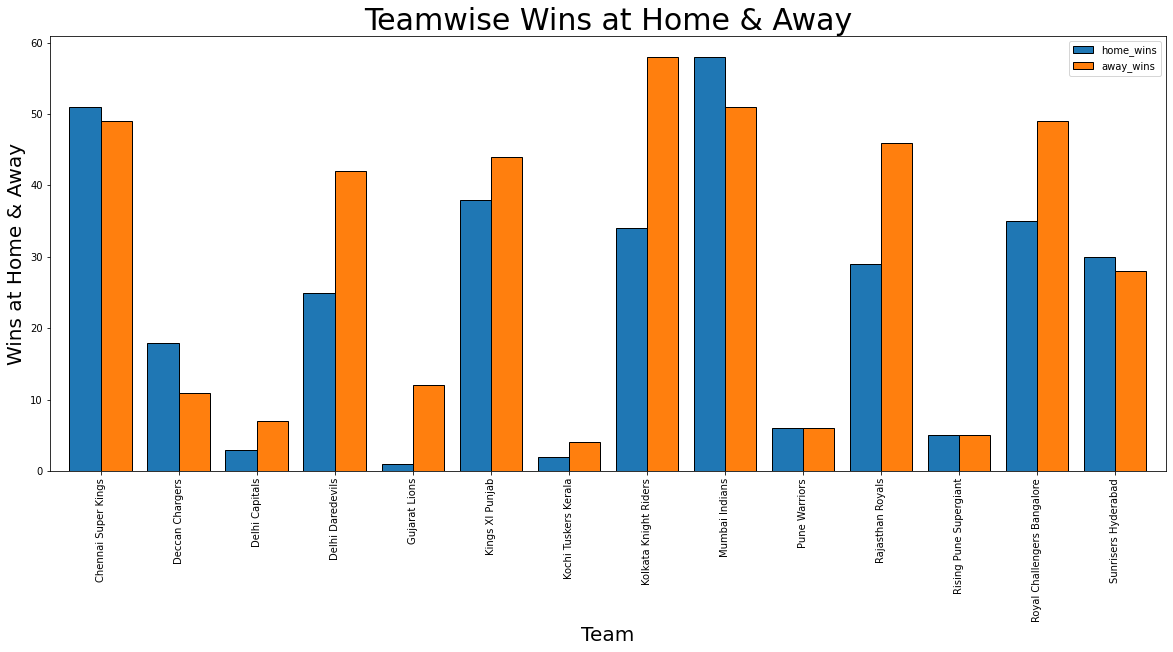

In [142]:
# Create the figure object 
qw = teamwise_home_and_away_df.groupby(['team'])[['home_wins','away_wins']].mean().plot.bar(
    width=0.8,
    linewidth= 1,
    edgecolor='black',
    figsize = (20,8),
    fontsize = 10,
)
plt.yticks(ticks = [x for x in range(0,70,10)])
plt.xticks(rotation = 90)
qw.set_title("Teamwise Wins at Home & Away", fontsize = 30)

# Set x-labels
qw.set_xlabel("Team", fontsize = 20)
qw.set_ylabel("Wins at Home & Away", fontsize = 20)

#**MOST_RUNS_AVERAGE_STRIKERATE**

**MOST RUNS BY THE BATSMAN**

In [17]:
most_runs_average_strikerate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   batsman        516 non-null    object 
 1   total_runs     516 non-null    int64  
 2   out            516 non-null    int64  
 3   numberofballs  516 non-null    int64  
 4   average        482 non-null    float64
 5   strikerate     516 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 24.3+ KB


In [18]:
most_runs_average_strikerate_df.describe()

,total_runs,out,numberofballs,average,strikerate
count,516.000000,516.000000,516.000000,482.000000,516.000000
mean,430.625969,17.063953,335.645349,16.355074,105.433442
std,882.275431,28.124511,663.593679,11.146222,39.633938
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,15.000000,2.000000,17.000000,8.000000,84.362069
50%,74.000000,5.500000,68.000000,14.607143,111.651584
75%,340.500000,18.000000,290.000000,23.657609,130.499036
max,5426.000000,161.000000,4111.000000,88.000000,250.000000


In [20]:
most_runs_average_strikerate_df.head(10)

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881
5,CH Gayle,4525,110,2972,41.136364,152.254374
6,MS Dhoni,4450,118,3206,37.711864,138.802246
7,RV Uthappa,4420,156,3381,28.333333,130.730553
8,AB de Villiers,4414,104,2902,42.442308,152.101999
9,G Gambhir,4219,134,3400,31.485075,124.088235


In [53]:
most_runs_by_batsman = most_runs_average_strikerate_df["total_runs"].loc[:9]

In [54]:
most_runs_by_batsman

0    5426
1    5386
2    4902
3    4717
4    4601
5    4525
6    4450
7    4420
8    4414
9    4219
Name: total_runs, dtype: int64

In [55]:
mostruns_batsman_name = most_runs_average_strikerate_df["batsman"].loc[:9]

In [56]:
mostruns_batsman_name

0           V Kohli
1          SK Raina
2         RG Sharma
3         DA Warner
4          S Dhawan
5          CH Gayle
6          MS Dhoni
7        RV Uthappa
8    AB de Villiers
9         G Gambhir
Name: batsman, dtype: object

<BarContainer object of 10 artists>

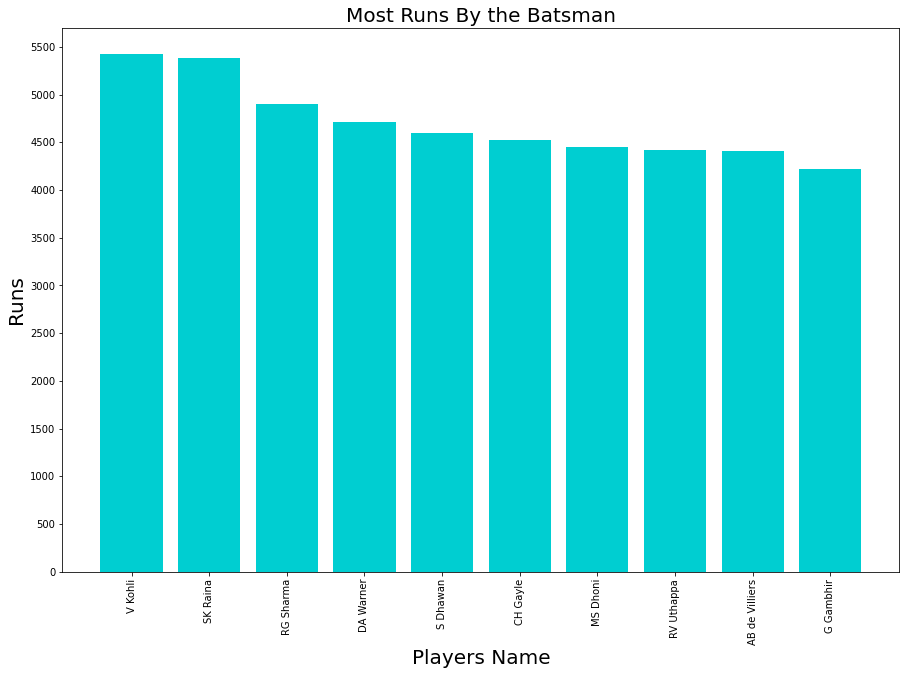

In [181]:
# Create the figure object(Most Runs By the Batsman)

plt.rcParams['figure.figsize'] = (15, 10)
plt.title("Most Runs By the Batsman",fontsize = 20)
plt.yticks(ticks = [x for x in range(0,6000,500)])
plt.xticks(rotation = 90)
plt.xlabel('Players Name',fontsize = 20)
plt.ylabel('Runs',fontsize = 20)
plt.bar(mostruns_batsman_name, most_runs_by_batsman, color='DARKTURQUOISE')

**AVERAGE OF THE BATSMAN**

In [165]:
batsman_average = pd.DataFrame(most_runs_average_strikerate_df.groupby(['batsman']).agg({'total_runs' : 'sum','out' : 'sum'}))
batsman_average["average"] = batsman_average['total_runs']/batsman_average['out']
batsman_average = batsman_average.sort_values(by = 'average',ascending = False)
batsman_average[batsmen_average['total_runs'] > 2500]

,total_runs,out,average
batsman,,,
AB de Villiers,4414,104,42.442308
DA Warner,4717,114,41.377193
CH Gayle,4525,110,41.136364
MS Dhoni,4450,118,37.711864
V Kohli,5426,152,35.697368
SK Raina,5386,160,33.662500
S Dhawan,4601,137,33.583942
AM Rahane,3834,117,32.769231
G Gambhir,4219,134,31.485075


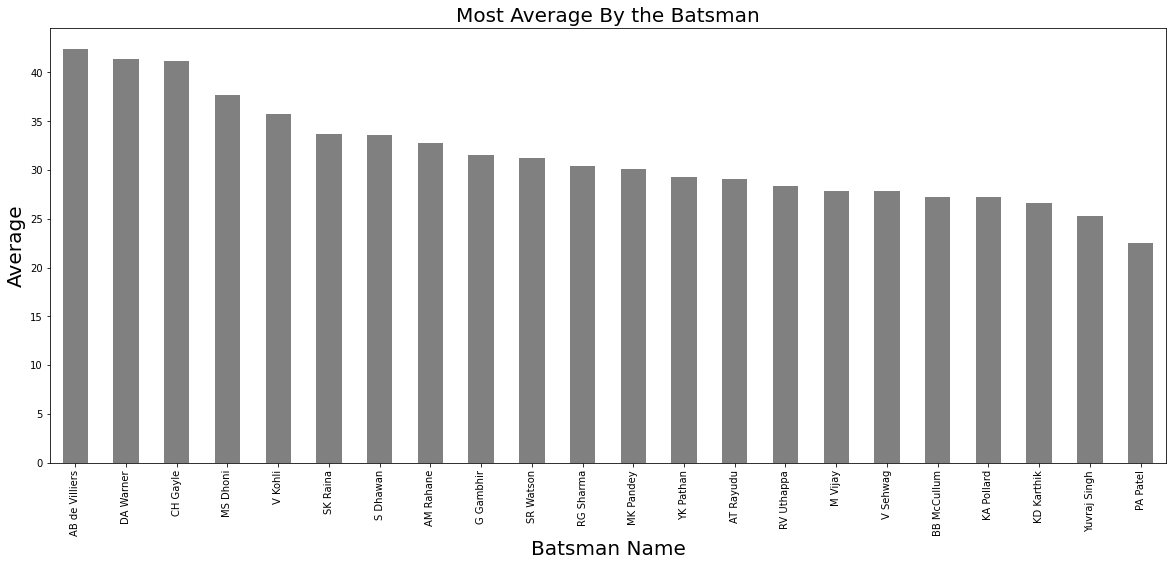

In [166]:
# Create the figure object(Most Average By the Batsman)

plt.rcParams['figure.figsize'] = 20,8
colors = (np.linspace(0,1,len(batsman_average[batsman_average['total_runs'] > 2500])))
batsman_average[batsmen_average['total_runs'] > 2500].plot(kind = 'bar',y = "average", color = 'grey',legend = '',fontsize = 10)
plt.title("Most Average By the Batsman",fontsize = 20)
plt.xlabel('Batsman Name',fontsize = 20)
plt.ylabel('Average',fontsize = 20)
plt.show()

**MOST STRIKE RATE BY THE BATSMAN**

In [171]:
batsman_strikerate = pd.DataFrame(most_runs_average_strikerate_df.groupby(['batsman']).agg({'total_runs' : 'sum','numberofballs' : 'sum'}))
batsman_strikerate['strikerate'] = batsman_strikerate['total_runs']/batsman_strikerate['numberofballs']*100
batsman_strikerate = batsman_strikerate.sort_values(by ='strikerate' , ascending = False)
batsman_strikerate[batsman_strikerate['total_runs'] > 2500]
# We have taken runs greater then 2500 So that we take a significant amount of runs

,total_runs,numberofballs,strikerate
batsman,,,
V Sehwag,2728,1746,156.242841
CH Gayle,4525,2972,152.254374
AB de Villiers,4414,2902,152.101999
KA Pollard,2772,1879,147.525279
YK Pathan,3222,2240,143.839286
DA Warner,4717,3292,143.286756
SR Watson,3590,2566,139.906469
MS Dhoni,4450,3206,138.802246
SK Raina,5386,3916,137.538304


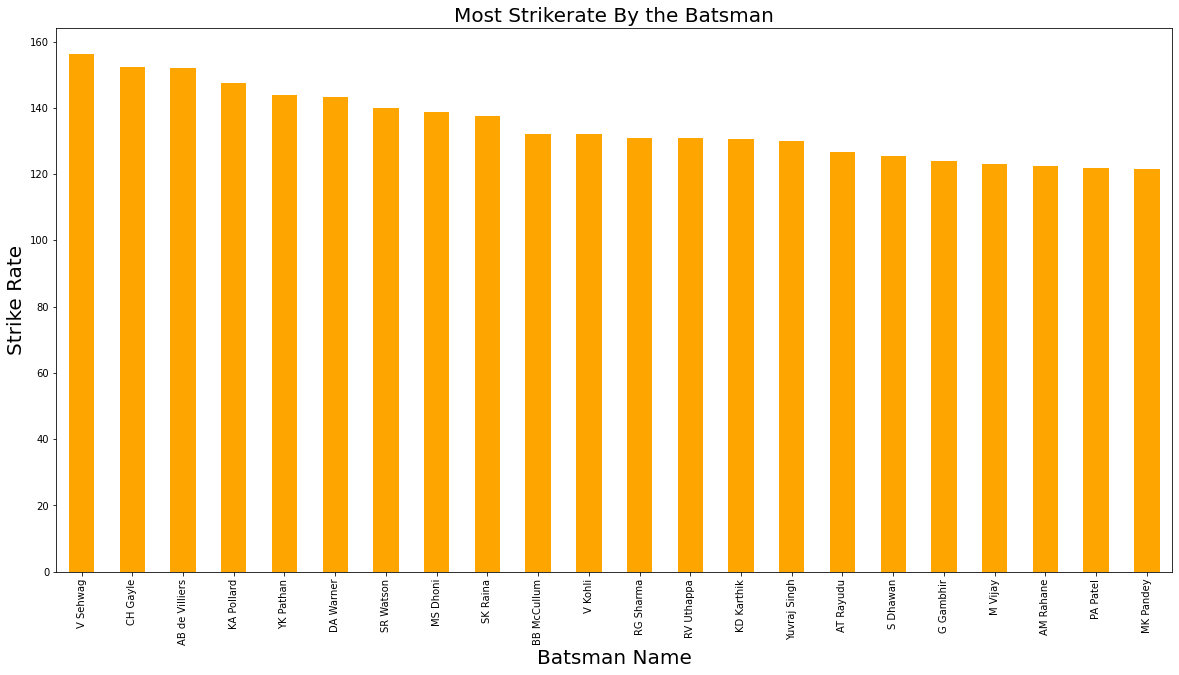

In [180]:
## Create the figure object(Most Strikerate By the Batsman)

plt.rcParams['figure.figsize'] = 20,10
colors = (np.linspace(0,1,len(batsman_strikerate[batsman_strikerate['total_runs'] > 2500])))
batsman_strikerate[batsman_strikerate['total_runs'] > 2500].plot(kind = 'bar',y = "strikerate", color = 'orange',legend = '',fontsize = 10)
plt.title("Most Strikerate By the Batsman",fontsize = 20)
plt.xlabel('Batsman Name',fontsize = 20)
plt.ylabel('Strike Rate',fontsize = 20)
plt.show()
